## OPEN CV 1차

##### 💡 목차
##### ✔ OpenCV 기본 이미지 처리
##### ✔ 흑백 변환 (cv2.IMREAD_GRAYSCALE)
##### ✔ 블러 처리 (cv2.GaussianBlur, cv2.medianBlur, cv2.bilateralFilter)
##### ✔ 엣지 검출 (cv2.Sobel, cv2.Laplacian, cv2.Canny)

In [1]:
# 기본 opencv-python 설치
!pip install opencv-python

In [2]:
# 버전 확인
import cv2
print(cv2.__version__)

4.11.0


### 원본 출력

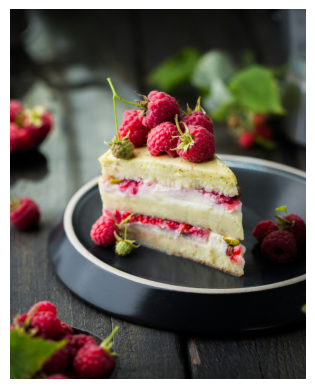

In [3]:
import cv2
import matplotlib.pyplot as plt

# 이미지 불러오기
img = cv2.imread("anna-tukhfatullina-food-photographer-stylist-Mzy-OjtCI70-unsplash.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# matplotlib로 출력
plt.imshow(img)
plt.axis("off")
plt.show()


### 흑백처리

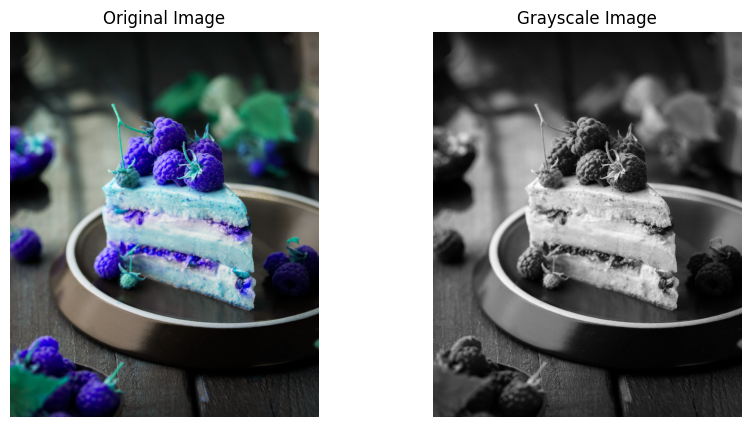

In [4]:
# 이미지 흑백 변환
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 이미지 출력
# 원본
plt.figure(figsize=(10,5)) # 그림 크기 조절
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 흑백
plt.subplot(1,2,2)
plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


In [5]:
import cv2
import matplotlib.pyplot as plt

# 이미지 불러오기
img = cv2.imread("anna-tukhfatullina-food-photographer-stylist-Mzy-OjtCI70-unsplash.jpg")

# 이미지가 정상적으로 로드되었는지 확인
if img is None:
    print("Error: 이미지 파일을 불러올 수 없습니다! 경로를 확인하세요.")
else:
    print("이미지 로드 성공!")


이미지 로드 성공!


In [6]:
# OPEN CV로 이미지 저장

cv2.imwrite("gray_image.jpg",gray_img)
print("Grayscale image saved successfully!")


Grayscale image saved successfully!


### 이진화(흑백이미지 강하게 변환)

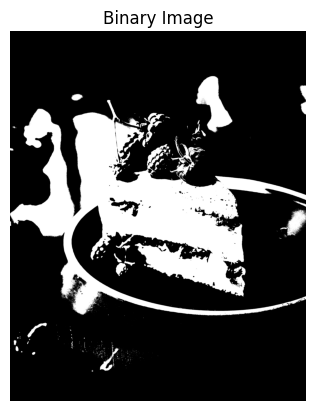

In [7]:
# 흑백이미지 강하게 변환

_,binary_img = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)

# 이미지 출력

plt.imshow(binary_img,cmap = 'gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

# 📌 cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY) : 127보다 밝은 픽셀은 흰색(255), 어두운 픽셀은 검은색(0)으로 변환
# 📌 이진화(Thresholding)는 글자 인식, OCR, 경계 검출 등에 활용됨!

### 블러 처리

#### 블러 처리는 이미지에서 노이즈를 줄이거나, 부드러운 효과를 주는 방법(대표적 방법 3가지)

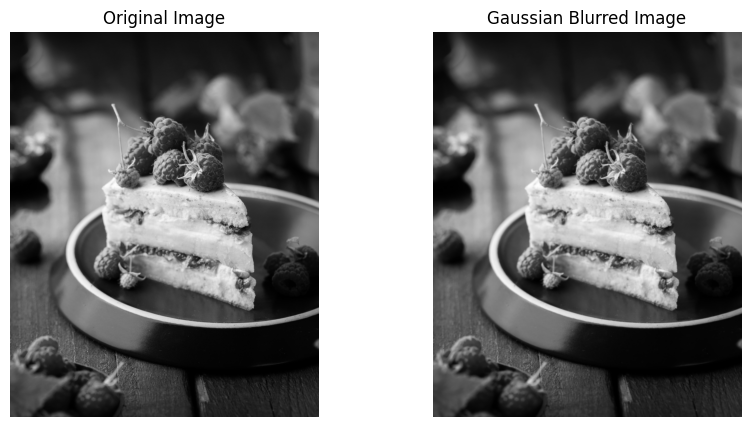

In [ ]:
# 1) (기본) 가우시안 blur


# 이미지 불러오기 & 흑백 변환
img = cv2.imread("anna-tukhfatullina-food-photographer-stylist-Mzy-OjtCI70-unsplash.jpg",cv2.IMREAD_GRAYSCALE)

# 가우시안 블러 적용 (커널 크기 5x5)
blurred_img = cv2.GaussianBlur(img,(17,17),0)

# 결과 출력

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap="gray")
plt.title("Gaussian Blurred Image")
plt.axis("off")

plt.show()

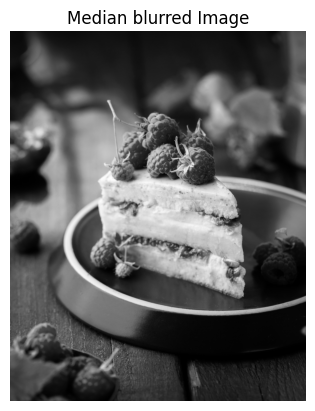

In [16]:
# 2) Median Blur(노이즈 제거에 효과적)

# 미디언 블러 적용
median_blur = cv2.medianBlur(img,5)

plt.imshow(median_blur,cmap='gray')
plt.title("Median blurred Image")
plt.axis("off")
plt.show()


# 📌 텍스트 인식 전처리에 유용

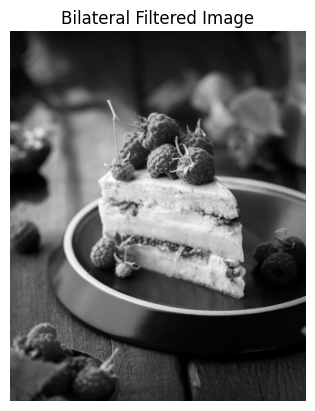

In [ ]:
# 3) Bilateral Filter(가장 효과적인 방법👍)

# d=9: 숫자가 클수록 강한 블러 효과 
# sigmaColer(색상의 표준 편차) = 75 : 숫자가 클수록 비슷한 영역을 블러링
# sigmaSpace=75(거리 표준편차) : 숫자가 클수록 더 먼 픽셀까지 블러 효과

bilateral_blur = cv2.bilateralFilter(img,9,75,75) # d=9: 숫자가 클수록 강한 블러 효과, sigmaColer(색상의 표준 편차) = 75:숫자가 클수록 비슷한 영역을 블러링,

plt.imshow(bilateral_blur, cmap="gray")
plt.title("Bilateral Filtered Image")
plt.axis("off")
plt.show()


# 특징
# 가장자리(Edge)를 유지하면서 블러 처리
# 일반적인 블러보다 더 선명한 효과를 유지하면서도 노이즈를 제거
# 사진 품질을 유지하면서 노이즈를 줄이고 싶을 때 유용

### 엣지 검출

##### 📌 엣지(Edge)는 밝기 변화가 급격하게 일어나는 부분을 의미
##### 📌 엣지를 찾으면 이미지에서 중요한 경계를 감지 가능
##### 📌 OpenCV에서는 여러 가지 엣지 검출 방법이 있는데, 대표적으로 Sobel, Laplacian, Canny를 사용

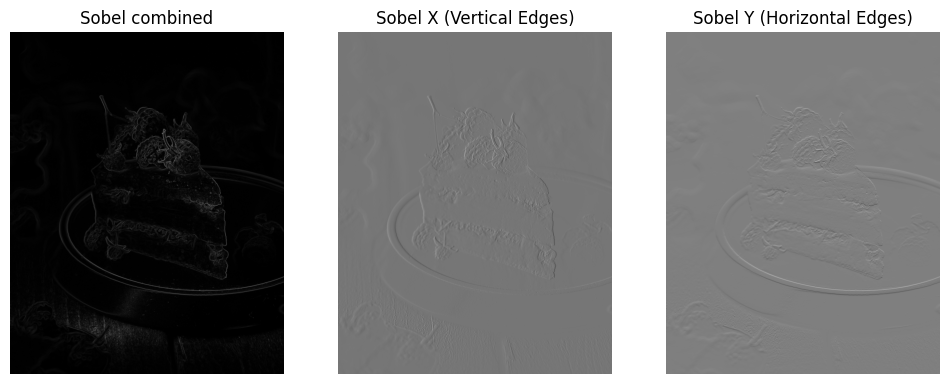

In [45]:
# 1) Sobel 필터(수평/수직 엣지 감지)
# Sobel 필터는 X(수직), Y(수평) 방향의 엣지를 각각 감지할 수 있는 필터


# 이미지 불러오기 & 흑백 변환
img = cv2.imread("anna-tukhfatullina-food-photographer-stylist-Mzy-OjtCI70-unsplash.jpg", cv2.IMREAD_GRAYSCALE)


# Sobel 엣지 검출(수평,수직)
sobel_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize =9)
sobel_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize =9)

# Sobel X + Sobel Y 결합 (가장 정확한 방법)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# 결과 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(sobel_combined, cmap="gray")
plt.title("Sobel combined")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap="gray")
plt.title("Sobel X (Vertical Edges)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap="gray")
plt.title("Sobel Y (Horizontal Edges)")
plt.axis("off")

plt.show()

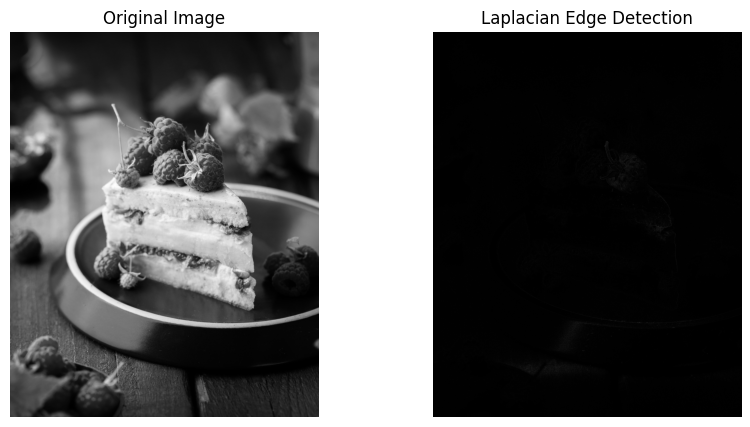

In [32]:
import numpy as np

# Laplacian 필터(모든 방향의 엣지 감지)

# CV_64F 사용 이유
# 📌 Sobel 필터 같은 미분 연산을 하면 음수(-) 값이 나올 수 있음
# 📌 하지만 이미지 픽셀 값(0~255)은 기본적으로 uint8(부호 없는 8비트 정수) 타입!
# 📌 만약 uint8을 사용하면 음수 값을 저장할 수 없어서 정보가 손실됨!
# 👉 그래서 cv2.CV_64F(float64)를 사용하면 음수 값까지 정확하게 보존 가능
# 그러나, 결론적으로는 절대값을 통해 unit8(0~255)값으로 변환해야함


laplacian = cv2.Laplacian(img, cv2.CV_8U)

# 결과 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian Edge Detection")
plt.axis("off")

plt.show()


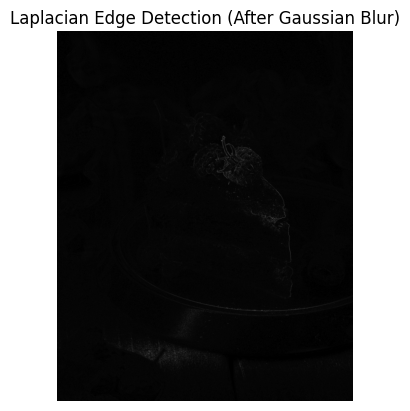

In [44]:
# 가우시안 블러 적용 (노이즈 제거)
blurred_img = cv2.GaussianBlur(img, (7, 7), 0)

# Laplacian 엣지 검출
laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F)

# 절댓값 변환 후 uint8 변환
laplacian = np.uint8(np.abs(laplacian))

# 결과 출력
plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian Edge Detection (After Gaussian Blur)")
plt.axis("off")
plt.show()


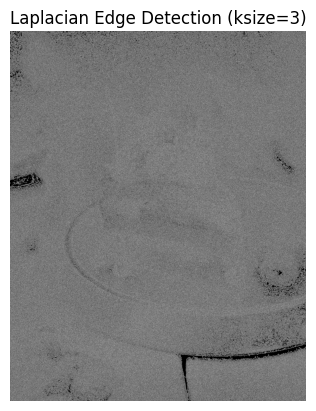

In [43]:
# Laplacian 엣지 검출 (커널 크기 변경)
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=7)

# 절댓값 변환 후 uint8 변환
laplacian = np.uint8(np.abs(laplacian))

# 결과 출력
plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian Edge Detection (ksize=3)")
plt.axis("off")
plt.show()


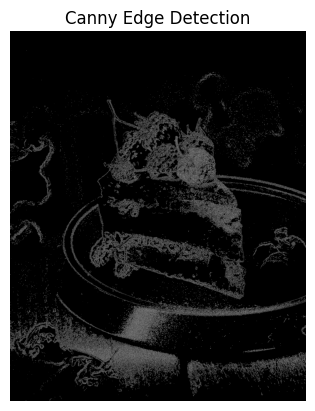

In [ ]:
# Canny 엣지 검출 (가장 강력한 엣지 감지 방법)

# 특징
# 1️⃣ 노이즈 제거 (Gaussian Blur 적용)
# 2️⃣ Sobel 필터 적용 (엣지 방향 검출)
# 3️⃣ 비최대 억제(Non-Maximum Suppression, NMS) → 약한 엣지 제거
# 4️⃣ 이중 임계값(Hysteresis Thresholding) 적용 → 중요한 엣지만 남기기


# 이미지 불러오기 & 흑백 변환
img = cv2.imread("anna-tukhfatullina-food-photographer-stylist-Mzy-OjtCI70-unsplash.jpg", cv2.IMREAD_GRAYSCALE)


# 엣지 검출(임계값 설정)
edges = cv2.Canny(img,20,40)

# 100 → 낮은 임계값 (약한 엣지 감지)
# 200 → 높은 임계값 (강한 엣지만 유지)
# 👉 엣지를 더 강하게 하고 싶으면 두 개의 값을 낮춰보자!

# 결과 출력
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

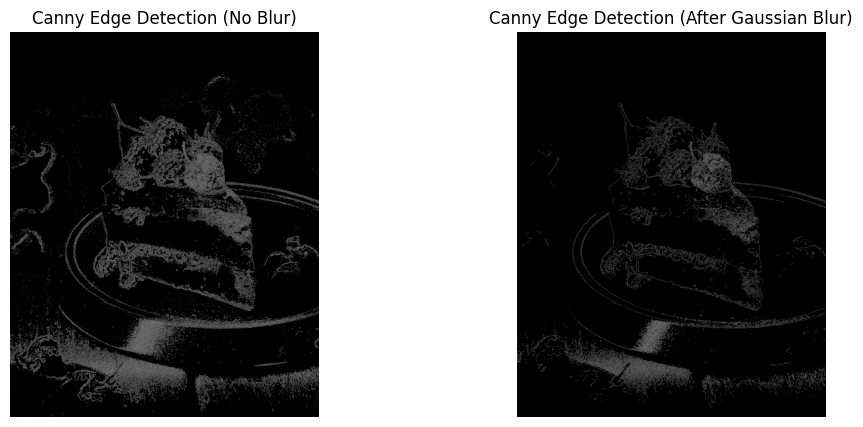

In [54]:
# 노이즈 많을 경우, Gaussian Blur + Canny 

# 가우시안 블러 적용 (노이즈 제거)
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Canny 엣지 검출
edges_blurred = cv2.Canny(blurred_img, 20, 40)

# 결과 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.Canny(img, 20, 40), cmap="gray")
plt.title("Canny Edge Detection (No Blur)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges_blurred, cmap="gray")
plt.title("Canny Edge Detection (After Gaussian Blur)")
plt.axis("off")

plt.show()
